In [1]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
#assign csv into a datframe
df = pd.read_csv("realtor-data.csv")

In [3]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [4]:
#a brief look at summary statistics of numerical variables
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,320108.000000,321618.000000,331873.000000,407693.000000,3.243650e+05,4.078900e+05
mean,3.500200,2.566545,17.418487,3299.396838,2.222783e+03,6.758307e+05
std,2.320135,2.391618,931.723094,2222.641467,3.333098e+03,1.178266e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.200000,1890.000000,1.206000e+03,1.999000e+05
50%,3.000000,2.000000,0.560000,2822.000000,1.767000e+03,3.979000e+05
75%,4.000000,3.000000,2.200000,4630.000000,2.640000e+03,7.090000e+05
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


In [5]:
df.shape

(407890, 10)

In [6]:
#other variables are turned into categorical variables
df[["status", "city", "state"]] = df[["status", "city", "state"]].astype("category")
df.dtypes

status            category
bed                float64
bath               float64
acre_lot           float64
city              category
state             category
zip_code           float64
house_size         float64
prev_sold_date      object
price              float64
dtype: object

In [7]:
#counts for each cateegorical variable to determine posssible data
for column in ["status", "city", "state"]: 
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for status:
for_sale          407130
ready_to_build       760
Name: status, dtype: int64

Value counts for city:
Boston          31502
San Juan         4788
Providence       4222
Springfield      3987
Worcester        3697
                ...  
Tomhegan Twp        1
Carmel              1
Hato Rey            1
Ta R2 Wels          1
T3 R12 Wels         1
Name: city, Length: 1412, dtype: int64

Value counts for state:
Massachusetts     173479
New Hampshire      51394
Vermont            46460
Connecticut        38180
Maine              36650
Rhode Island       28518
Puerto Rico        24679
New York            5829
Virgin Islands      2573
Georgia               48
South Carolina        24
Tennessee             20
Virginia              20
New Jersey            13
Wyoming                3
Name: state, dtype: int64



In [8]:
#look for missing data
df.isnull().sum()

status                 0
bed                87782
bath               86272
acre_lot           76017
city                  52
state                  0
zip_code             197
house_size         83525
prev_sold_date    266940
price                  0
dtype: int64

<Axes: >

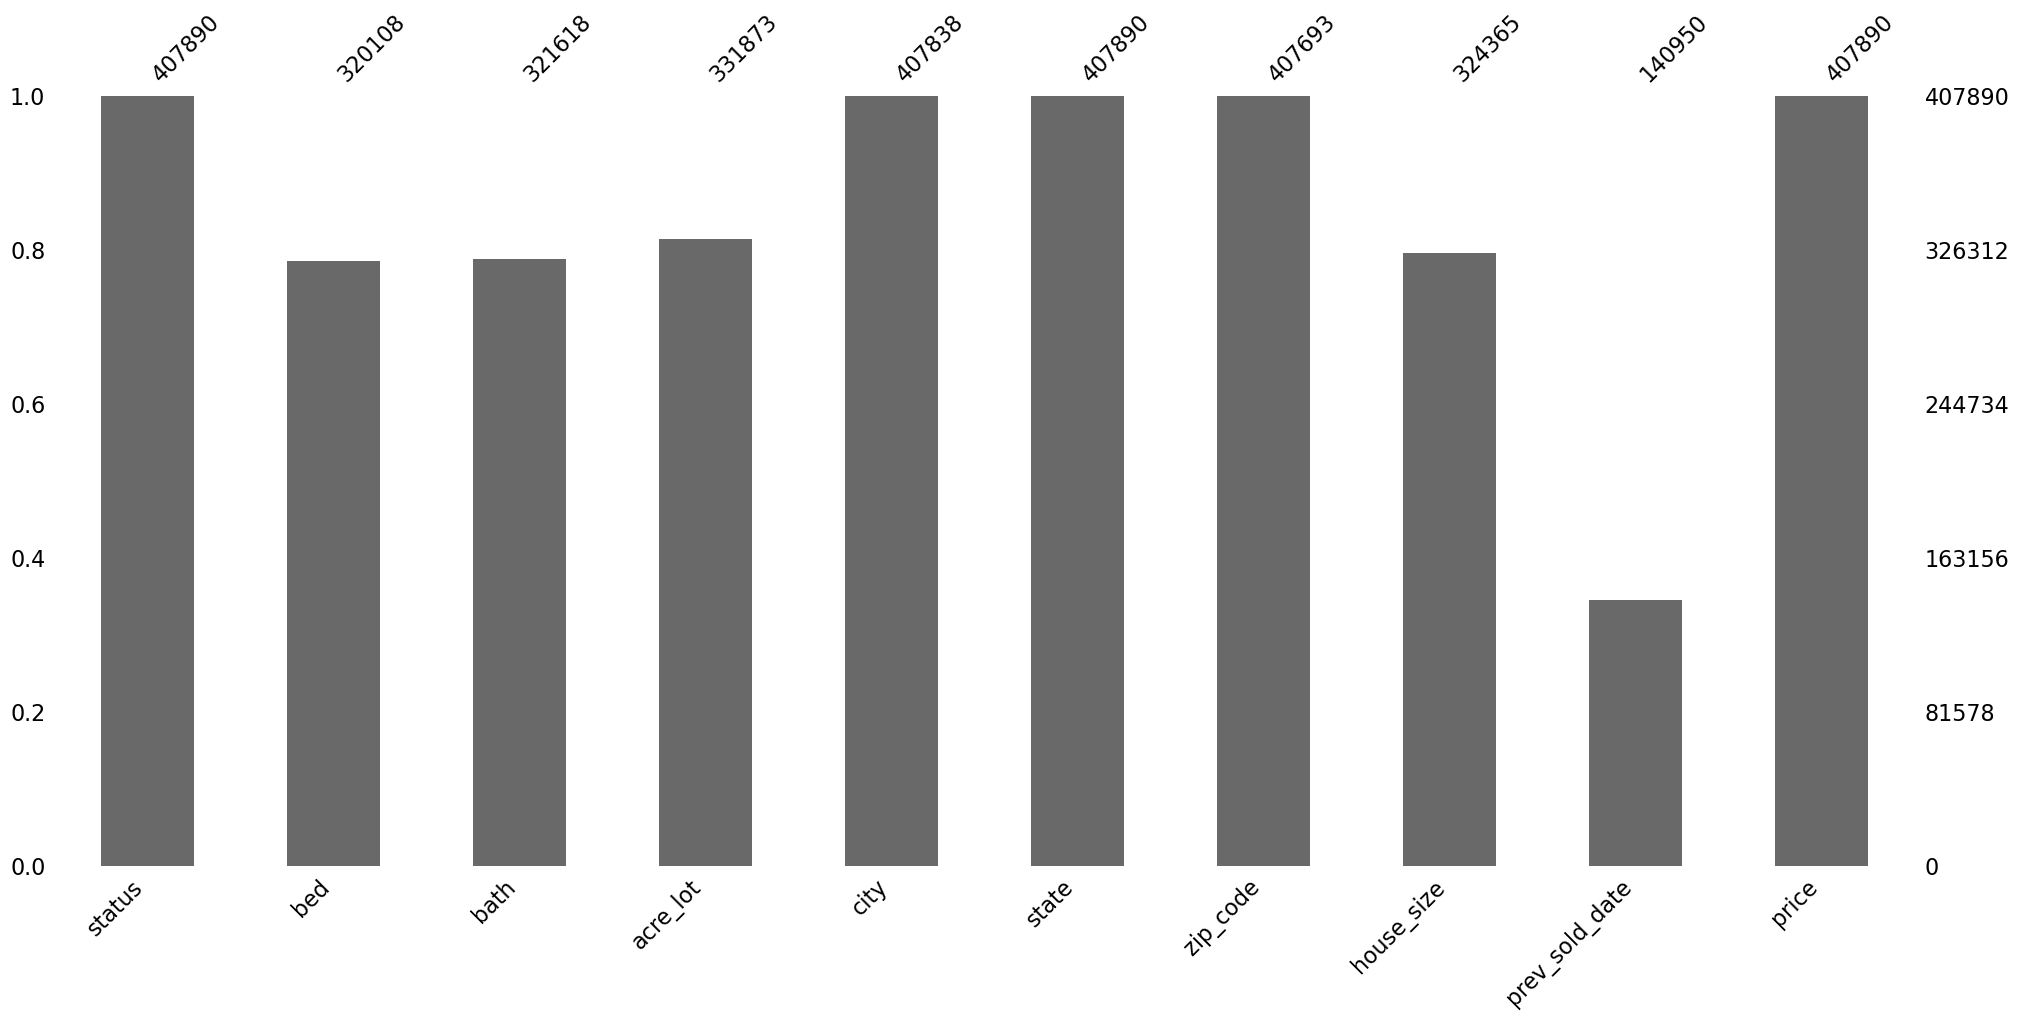

In [9]:
msno.bar(df)